In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
from xmlpathology.xmlbatchgenerator.generators import XmlBatchGenerator
from xmlpathology.xmlbatchgenerator.core.samplers import SamplerLoader, Sampler
from xmlpathology.xmlbatchgenerator.core.controllers import SamplerControllerLoader, FslSamplerController
from xmlpathology.xmlbatchgenerator.core.controllers import LabelControllerLoader, IndexControllerLoader, FslRandomIndexController, FslRandomLabelController
import time
from matplotlib import pyplot as plt
import numpy as np

In [2]:
data_sources = {'training': [{'image_path': '/home/mart/Radboudumc/data/breast/T10-10714-I-5-1.tif',
                              'annotation_path': '/home/mart/Radboudumc/data/breast/level1/T10-10714-I-5-1.xml'},
                              {'image_path': '/home/mart/Radboudumc/data/breast/T14-28434-I-7.tif',
                              'annotation_path': '/home/mart/Radboudumc/data/breast/level1/T14-28434-I-7.xml'}]}

In [3]:
generator = XmlBatchGenerator(data_sources=data_sources, 
                                  label_map={'idc':1, 'stroma':2, 'inflammatory cells': 3, 'erythrocytes': 4, 'non malignant epithelium': 5},
                                  cpus=1,
                                  sampler_loader=SamplerLoader(_class=Sampler, input_shapes=[(256, 256, 3), (256, 256, 3)], spacings=[0.5, 2.0]),
                                  batch_size=1)

In [4]:
x_batch, y_batch = generator.batch('training')
np.array(x_batch).shape

(1, 2, 2, 256, 256, 3)

In [6]:
generator = XmlBatchGenerator(data_sources=data_sources, 
                                  label_map={'idc':1, 'stroma':2, 'inflammatory cells': 3, 'erythrocytes': 4, 'non malignant epithelium': 5},
                                  cpus=1,
                                  batch_size=1,
                                  sampler_loader=SamplerLoader(_class=Sampler, input_shapes=[(256, 256, 3)], spacings=[0.5]),
                                  label_controller_loader=LabelControllerLoader(FslRandomLabelController),
                                  index_controller_loader=IndexControllerLoader(FslRandomIndexController),
                                  sampler_controller_loader=SamplerControllerLoader(_class=FslSamplerController,
                                                                                    n_shots=1,
                                                                                    n_way=5,
                                                                                    n_queries=6)) #'stroma':2, 'fatty tissue': 3
# generator.start()

ValueError: FslSampleCOntroller: inflammatory cells (n=5)  does not have 7 samples

In [58]:
nshots, nqueries = 1, 4
s = nshots + nqueries
x_batch, _ = generator.batch('training')
splits = np.array(np.array_split(x_batch, s))
support, query = np.array_split(splits,[1], axis=1)
# support = support.transpose(1,0,2,3,4)
# query = query.transpose(1,0,2,3,4)

In [59]:
print(support.shape)

(5, 1, 256, 256, 3)


(5, 1, 256, 256, 3)


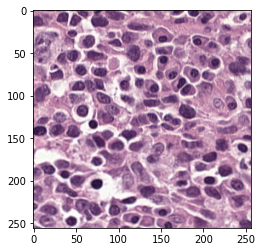

In [55]:
print(support.shape)
plt.imshow(support[4][0])
plt.show()

In [ ]:
generator.batch('training')

In [ ]:
plt.imshow(querie[4][3])
plt.show()

In [ ]:
class MyDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, data_sources, label_map):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self._generator = XmlBatchGeneratorVanilla(data_sources=data_sources, label_map=label_map, batch_size=12)

    def __len__(self):
        return 1

    def __getitem__(self, idx):
        return self._generator.batch('training')


dset = MyDataset(data_sources=data_sources, label_map={'idc':1, 'stroma':2, 'fatty tissue': 3})
dloader = DataLoader(dset, num_workers=6)

In [ ]:
for i in range(100):
    t1 = time.time()
    for idx, sample in enumerate(dloader):
        s = sample
    t2 = time.time()

    print(t2-t1)

In [18]:
a = 1


try:
    a +=1 
    a /0
except:
    pass

print(a)

2
